<a href="https://colab.research.google.com/github/yohancsx/SmartMask/blob/main/tf_lite/BleSenseSmartMaskML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook for the BLE Smart Mask Project
Trains the tf model to recognize various pressure changes and correlate to behaviors which are talking, coughing, heavy breathing and light breathing.
Also converts the model into arduino-friendly format.

In [1]:
#set up the notebook
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.0.0-rc1

Selecting previously unselected package xxd.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.4_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.4) ...
Setting up xxd (2:8.0.1453-1ubuntu1.4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 86.3MB 46kB/s 
     |████████████████████████████████| 4.3MB 49.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 501kB 48.2MB/s 
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
#load all the data into seperate dataframes

#the name for the breathing data
breathingFile = "regular_breathing.csv"

#the name for the coughing data
coughingFile = "coughing.csv"

#the filename for the talking data
talkingFile = "talking.csv"

#the filename for the deep breathing data
deepBreathingFile = "deep_breathing.csv"

#the filename for the combined data
combinedFile = "mixed.csv"

#plot some of the data on the same axes
dfTalk = (pd.read_csv("/content/" + talkingFile, index_col=False, header=None, names = ["talking"])).dropna(axis = 1)
dfBreathe = (pd.read_csv("/content/" + breathingFile, index_col=False, header=None, names = ["breathing"])).dropna(axis = 1)
dfCough = (pd.read_csv("/content/" + coughingFile, index_col=False, header=None, names = ["coughing"])).dropna(axis = 1)
dfDeepBreathe = (pd.read_csv("/content/" + deepBreathingFile, index_col=False, header=None, names = ["deepBreathing"])).dropna(axis = 1)
dfMixed = (pd.read_csv("/content/" + talkingFile, index_col=False, header=None, names = ["mixed"])).dropna(axis = 1)

[1321, 1859, 1172, 2047]

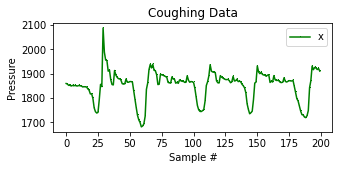

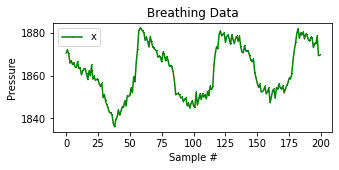

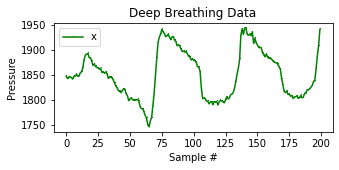

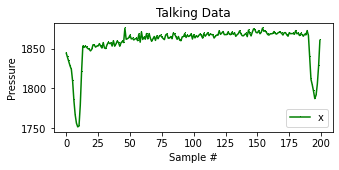

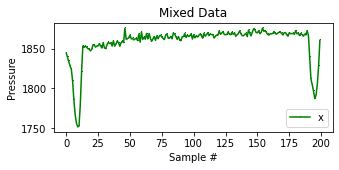

In [22]:
#plot some of the sample data
plt.rcParams["figure.figsize"] = (5,2)

#the indices
index = range(0, 200)

plt.plot(index, dfCough.head(200), 'g.', label='x', linestyle='solid', marker=',')
plt.title("Coughing Data")
plt.xlabel("Sample #")
plt.ylabel("Pressure")
plt.legend()
plt.show()

plt.plot(index, dfBreathe.head(200), 'g.', label='x', linestyle='solid', marker=',')
plt.title("Breathing Data")
plt.xlabel("Sample #")
plt.ylabel("Pressure")
plt.legend()
plt.show()

plt.plot(index, dfDeepBreathe.head(200), 'g.', label='x', linestyle='solid', marker=',')
plt.title("Deep Breathing Data")
plt.xlabel("Sample #")
plt.ylabel("Pressure")
plt.legend()
plt.show()

plt.plot(index, dfTalk.head(200), 'g.', label='x', linestyle='solid', marker=',')
plt.title("Talking Data")
plt.xlabel("Sample #")
plt.ylabel("Pressure")
plt.legend()
plt.show()

plt.plot(index, dfMixed.head(200), 'g.', label='x', linestyle='solid', marker=',')
plt.title("Mixed Data")
plt.xlabel("Sample #")
plt.ylabel("Pressure")
plt.legend()
plt.show()



In [ ]:
#set the random seed
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)